# 문제정의
- 영화 리뷰 데이터셋을 활용해서 긍정리뷰와 부정리뷰를 구분
- 긍정 / 부정 리뷰에서 자주 사용되는 단어 확인

# 데이터 수집
- Large movie dataset 다운로드

In [61]:
from sklearn.datasets import load_files # 파일을 읽어오는 함수

In [62]:
train_data_url = 'data/aclImdb/train'
test_data_url = 'data/aclImdb/test'

In [63]:
reviews_train = load_files(train_data_url, shuffle=True)
reviews_test = load_files(test_data_url, shuffle=True)

In [64]:
reviews_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [65]:
len(reviews_train.data)

25000

In [66]:
reviews_train.data[0]

b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

In [67]:
reviews_train.target

array([1, 0, 1, ..., 0, 0, 0])

# 데이터전처리

In [68]:
reviews_train.data[0]

b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

## 태그 제거
- br태그를 띄어쓰기로 변경

In [69]:
reviews_train.data[0].replace(b"<br />",b" ")

b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.  It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see.   Flawed but honest with a terrible honesty."

In [70]:
X_train=reviews_train.data[:1000]
X_test=reviews_test.data[:1000]

In [71]:
y_train = reviews_train.target[:1000]
y_test = reviews_test.target[:1000]

In [72]:
# 리스트내포
X_train = [ txt.replace(b"<br />", b" ")  for txt in X_train ]
X_test = [ txt.replace(b"<br />", b" ")  for txt in X_test ]

In [73]:
X_train[0]

b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.  It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see.   Flawed but honest with a terrible honesty."

## 토큰화

### 예시
- BOW 문장을 단위로 수치화 해주는 방법

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
testBOW = CountVectorizer()

In [76]:
text = [
    '혹시 자소서 포함된 이력서 , 자소서 양식을 미리 받아볼수 있나요?',
    '다음주월욜에 하는게 자소서가 좀 적혀있어야 한다는거죠..?',
    '강의실 하나에서 다 모여서 진행하는건가요?',
    '혜정이가 카드 스티커 모으는 거 좋아해요'        
]

In [77]:
testBOW.fit(text) # 단어사전 구축, 토큰화

CountVectorizer()

In [78]:
testBOW.vocabulary_

{'혹시': 21,
 '자소서': 10,
 '포함된': 16,
 '이력서': 8,
 '양식을': 7,
 '미리': 4,
 '받아볼수': 5,
 '있나요': 9,
 '다음주월욜에': 1,
 '하는게': 18,
 '자소서가': 11,
 '적혀있어야': 12,
 '한다는거죠': 19,
 '강의실': 0,
 '하나에서': 17,
 '모여서': 2,
 '진행하는건가요': 14,
 '혜정이가': 20,
 '카드': 15,
 '스티커': 6,
 '모으는': 3,
 '좋아해요': 13}

In [79]:
testBOW.transform(text) # 수치화, 벡터화

<4x22 sparse matrix of type '<class 'numpy.int64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [80]:
testBOW.transform(text).toarray()

array([[0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0]],
      dtype=int64)

### 실제 데이터 적용

In [81]:
movie_bow =CountVectorizer(min_df=20, max_df=2000, ngram_range=(1,3))
movie_bow.fit(X_train)
X_train = movie_bow.transform(X_train)
X_test = movie_bow.transform(X_test)

In [82]:
X_train.shape

(1000, 1818)

# 탐색적 데이터 분석
- 텍스트 기반 데이터는 큰 영향을 주지 않는다

# 모델 선택 및 하이퍼 파라미터 튜닝

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [84]:
tree = DecisionTreeClassifier()
svm =LinearSVC()
knn = KNeighborsClassifier()

## 교차검증

In [85]:
from sklearn.model_selection import cross_val_score

In [86]:
cross_val_score(tree, X_train, y_train, cv=5).mean()

0.671

In [87]:
cross_val_score(svm, X_train, y_train, cv=5).mean()

0.776

In [88]:
cross_val_score(knn, X_train, y_train, cv=5).mean()

0.59

# 학습

In [89]:
svm.fit(X_train, y_train)

LinearSVC()

# 평가

In [90]:
svm.score(X_train, y_train)

1.0

In [91]:
svm.score(X_test,y_test)

0.755

## 예측
- 예측 데이터도 동일한 순서대로 처리해주어야함
- 데이터 > 토큰화 > 수치화

In [92]:
reviews = ["Wow. This is one of the most mind bending things in media. It makes Age Of Ultron better, it is very funny, the characters are so suprising and it also plays well into the MCU in other ways. The episode before the final one has great writing and the final showdowns are like watching an MCU film. This whole thing would be great as an MCU film, the way it plays. The return of people blipped also was interesting here and the story of Infinity War playing into the Vision storyline and how Wanda really just wanted more time with him. It is defismtly emotional and touching. Disney+ started off right with their first MCU tie in. The moral of this is that it seems to expose witchcraft rather then embrace it, which is good. (It might be exposing it). Jesus is our only hope.",
            """ "We are an unusual couple, you know." "Oh, I don't think that was ever in question." Now, before I begin, there are many opinions of this show. Many fans and people just introduced to the MCU have strong opinions which has made this a very divided addition to the MCU. Critically, it's been praised and there aren't many people who don't like it. But with the unique approach, some have been upset for such the high ratings. What I'm trying to say is I ask you to bear with me and respect my opinion. If you differ with it, there's nothing you can do to change my mind. The absolute masterpiece that is WandaVision blends the style of classic sitcoms with the MCU, in which Wanda Maximoff and Vision - two super-powered beings living their ideal suburban lives - begin to suspect that everything is not as it seems. From that teaser at the Super Bowl (I believe) over a year ago, this had been something exciting to look forward to. Literally no one knew what this would be about going in, really. I refrained from all trailers to go in as blind as possible. What I got was more than what I could imagine. Trying something new is what I've hoped for in the MCU for a while. As much as I do love a good majority of their movies, there's a fixed setup for almost all. WandaVision is something totally different and just what we needed. Had this been a show outside of the MCU, I think it would still be brilliant. Each episode is designed to go through a different era of television. How they handled it worked incredibly well. There's not a way of trying to modernize these old sitcoms from the 1950s and so forth, so it's like a replication of classic television. The sets, costumes, and camera lens and moment are amazing at doing so. One of my favorite games while watching is trying to see what show this episode was mainly based on. Accomplishing this couldn't have been easy and I applaud them for how they managed to get the feel of each era perfectly. At the heart of this story are amazing performances. Elizabeth Olson hasn't had such an amazing display of acting since Martha Marcy May Marlene. So much emotion is put forth into Wanda that she is by far the most developed character in the MCU even if she came in late. There are some really heavy scenes and she portrayed those flawlessly. It doesn't feel much like watching a magical being, but we understand she's just another person in this world. Scene 8 showcases it all. Alongside her is Paul Bettany. With his character of Vision — a literal computer-god-being — it's hard to get complete range. He has such a good start with the series by delivering comedy. He's really funny in it (and Olsen too). Once the mystery starts to unfold, he builds more and more character until episode 5 when he unleashes his full capabilities. Never has Vision felt so human before. I'd also like to highlight Kathryn Hahn, because she's such an amazing actress. Playing the nosy-neighbor of Agnes must've been such a fun time. She takes up all the screen time she can get. I won't spoil a thing, but later on in the series she gets her moment — literally everyone's favorite moment — and you just love her even more. Teyonah Paris, Kat Dennings, and Randall Park also do well with their supporting roles. This is an ensemble piece for sure and the way they work off of each other shows dedication. It's hard to discuss so much without spoiling because certain things do need to be addressed, but I shall refrain. Story is where people have been divided. Some thought it took way too long to get into, and I just don't see why. It's a series, not a movie, so setup is much different. And if it were to have moved on quickly, the mystery element would've lost its momentum. Every episode has some sort of question leading up to the finale. That's where fan theories came in and caused even more disappointments. I support fan theories, but I don't base my expectation on the rest of the show. Even if I had some hopeful thoughts, I never expected them to show up later on. With expectation, you can only be disappointed. My suggestion is to not have anything in mind when going in. Questions kept building and that's what made this the most gripping show I had seen in such a long time. I would stay up till 2 a.m. for the release of the new episodes because I just had to know what would come next. With a series, there was more time to develop and think about plot and character. Most importantly, though, there was enough time to build upon the past episodes and make an enjoyable time for both the sitcom moments and the Marvel storyline. Sure, not every episode is as great as the one before or after. I don't think you'll ever find a show with each episode being perfect as ever. Take a highly regarded show like Breaking Bad. Many think of it as a perfect show, but it's not like they think every episode is perfect. To quote Steven Universe, one of my favorite shows, "if every pork chop were perfect, we wouldn't have hotdogs." If every episode were perfect, it wouldn't have that range that it has. I don't grade a show based on each episode, but rather as a whole. And throughout the duration of WandaVision, I had an absolute blast. Marvel, Matt Shakman, and the whole crew made something unforgettable. I believe this to be the greatest thing the MCU has given us. There will never be a show quite like WandaVision. Only a few shows have gotten my perfect rating, and this ranks among them. """ ,
          ''' ( SPOILERS) Absolute garbage and a waste of time. Full of plot twists that end up being nothing. Vision having holes in his body had nothing to do with the plot. Pietro having holes in his body had nothing to do with the plot. Pietro being from X'men was just a random coincidence. Also, every time a new male character walked into the show you knew he was either a wimp or evil. They even made pietros real last name "bohner" to make fun of manhood. Imagine if a female character everyone was stoked on turned out to be some random lady named "Vachina". Also, the physical vision just flew off for no reason, and digital vision never decided to tell wanda about his existence. Why? Lazy writing. Additionally at the end rhambeaou tells wanda "they will never know what you sacrificed". What the heck?! Like maybe apologize for trapping and tormenting these people every day for like a month. How on earth is wanda the victim or the "good-guy" in this show. She is literally a villain causing everyone pain, but it is "ok" because she did it out of a place of pain. Im sorry, almost all villains do evil out of a place of pain, that doesnt make it ok. Stupid, sexist show with bad plot that treats its audience like idiots. '''
          ]

In [93]:
pred_review = movie_bow.transform(reviews) # 토큰화 및 수치화

In [94]:
svm.predict(pred_review)

array([1, 1, 0])

## 감정분석
- 어떤 단어가 긍정/부정에 영향을 많이 주었는지 확인

In [95]:
word_weight =svm.coef_
word_weight

array([[ 0.00429933, -0.10618023,  0.03447677, ..., -0.05016931,
        -0.04790392, -0.07472479]])

In [96]:
movie_bow.vocabulary_

{'day': 313,
 'leads': 805,
 'you': 1799,
 'to': 1562,
 'think': 1521,
 'even': 396,
 're': 1172,
 'why': 1748,
 'two': 1623,
 'young': 1813,
 'men': 898,
 'would': 1783,
 'do': 339,
 'what': 1715,
 'they': 1511,
 'did': 328,
 'their': 1496,
 'it': 734,
 'must': 955,
 'be': 163,
 'beyond': 189,
 'of': 1006,
 'being': 180,
 'for': 487,
 'who': 1738,
 'have': 582,
 'decided': 319,
 'from': 510,
 'in': 662,
 'order': 1075,
 'own': 1095,
 'world': 1777,
 'is': 705,
 'not': 985,
 'perfect': 1110,
 'movie': 931,
 'but': 213,
 'given': 538,
 'money': 917,
 'time': 1555,
 'the': 1407,
 'and': 57,
 'actors': 19,
 'had': 563,
 'remarkable': 1190,
 'better': 185,
 'than': 1384,
 'film': 455,
 'that': 1387,
 'gets': 531,
 'under': 1628,
 'our': 1082,
 'far': 438,
 'almost': 41,
 'anything': 99,
 'are': 106,
 'see': 1236,
 'with': 1753,
 'terrible': 1383,
 'to think': 1590,
 'what they': 1720,
 'must be': 956,
 'who have': 1741,
 'their own': 1497,
 'it is': 746,
 'is not': 718,
 'movie but': 933,


In [97]:
import pandas as pd
df = pd.DataFrame([movie_bow.vocabulary_.keys(), movie_bow.vocabulary_.values()])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,...,1758,1759,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817
0,day,leads,you,to,think,even,re,why,two,young,men,would,do,what,they,did,their,it,must,be,beyond,of,being,for,who,have,decided,from,in,order,own,world,is,not,perfect,movie,but,given,money,time,the,and,actors,had,remarkable,better,than,film,that,gets,under,our,far,almost,anything,are,see,with,terrible,to think,...,romance,novel,his own,tell,easy,but it is,suspense,aspects,the second,which was,around the,main character,rare,laughs,of this film,away from,places,the final,you want to,concept,tom,rate,atmosphere,asks,except,following,space,his best,sad,material,on tv,greatest,the greatest,have ever seen,add,london,the action,moving,previous,working,not have,from his,at his,cover,says,this time,manages,manages to,of any,ultimately,bring,and it is,incredibly,beauty,meant,people and,for that,for him,impressive,meant to
1,313,805,1799,1562,1521,396,1172,1748,1623,1813,898,1783,339,1715,1511,328,1496,734,955,163,189,1006,180,487,1738,582,319,510,662,1075,1095,1777,705,985,1110,931,213,538,917,1555,1407,57,19,563,1190,185,1384,455,1387,531,1628,1082,438,41,99,106,1236,1753,1383,1590,...,1208,998,623,1379,367,218,1367,134,1477,1734,115,864,1167,803,1035,149,1123,1436,1811,285,1598,1168,142,132,414,486,1321,621,1213,882,1055,557,1442,585,23,835,1410,946,1153,1775,989,511,137,300,1223,1541,876,877,1010,1627,205,72,692,166,893,1108,496,490,661,894


In [98]:
df = df.T
df

,0,1
0,day,313
1,leads,805
2,you,1799
3,to,1562
4,think,1521
...,...,...
1813,people and,1108
1814,for that,496
1815,for him,490
1816,impressive,661


In [99]:
df_sorted=df.sort_values(by=1)
df_sorted

,0,1
217,10,0
1609,20,1
265,30,2
597,able,3
636,able to,4
...,...,...
9,young,1813
1600,younger,1814
661,your,1815
668,your time,1816


In [100]:
df_sorted['coef'] = word_weight.reshape(-1)

In [101]:
df_sorted

,0,1,coef
217,10,0,0.004299
1609,20,1,-0.106180
265,30,2,0.034477
597,able,3,-0.020460
636,able to,4,-0.020460
...,...,...,...
9,young,1813,0.031144
1600,younger,1814,0.124821
661,your,1815,-0.050169
668,your time,1816,-0.047904


In [102]:
df_sorted.sort_values(by='coef', inplace=True)
df_sorted

,0,1,coef
78,bad,156,-0.346888
1207,awful,151,-0.329484
467,worst,1780,-0.265895
1001,actress,20,-0.261336
7,why,1748,-0.252723
...,...,...,...
34,perfect,1110,0.235935
154,that there,1400,0.251360
934,feel,444,0.268601
922,enjoy,383,0.276861


In [103]:
# 시각화
top30_df = pd.concat([
    df_sorted.head(30), # 부정단어 30개
    df_sorted.tail(30) # 긍정단어 30개
])

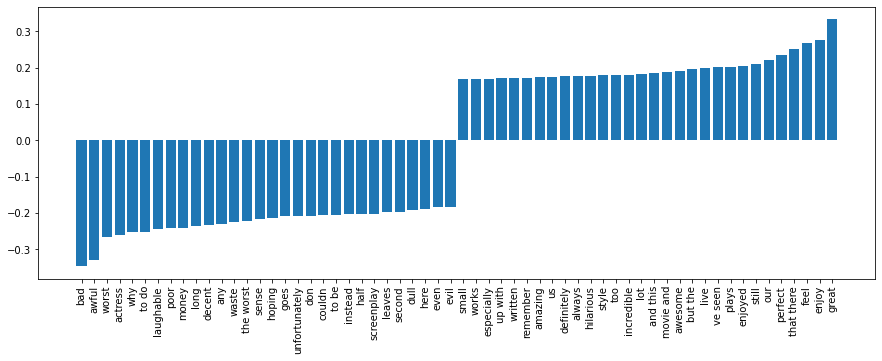

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5)) # 가로,세로 비율
plt.bar(top30_df[0], top30_df['coef']) # x축은 단어, y축은 가중치
plt.xticks(rotation = 90) # x축 눈금 각도 조정
plt.show()